In [1]:
#importing_libraries
import numpy as np
from numpy import gradient
import h5py
#%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
#christoffel_symbols with pytearcat
import pytearcat as pt

$$ds^2 = a^2(\tau)[-(1+2\Phi)d\tau^2 + (1-2\Phi)\delta_{ij}dx^i dx^j]$$

In [2]:
# Define the coordinates to be used
tau,x,y,z = pt.coords('tau,x,y,z')
# Define any constant (more than one constant can be defined at the same time)
a = pt.fun('a','tau')
Phi = pt.fun('Phi','x,y,z')
ds2 = 'ds2 = a**2*(-(1 + 2*Phi)*dtau**2 + (1 - 2*Phi)*(dx**2 + dy**2 + dz**2))'
g = pt.metric(ds2)

Remember that the time coordinate must be the first coordinate.

Dimension = 4
Coordinates = tau,x,y,z
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-2*Phi(x, y, z)*a(tau)**2 - a(tau)**2,                                     0,                                     0,                                     0],
[                                    0, -2*Phi(x, y, z)*a(tau)**2 + a(tau)**2,                                     0,                                     0],
[                                    0,                                     0, -2*Phi(x, y, z)*a(tau)**2 + a(tau)**2,                                     0],
[                                    0,                                     0,                                     0, -2*Phi(x, y, z)*a(tau)**2 + a(tau)**2]])

In [3]:
# To calculate the second kind without the first kind:
Chr = pt.christoffel(First_kind = False)

# To display only a particular combination of indices, e.g., the Second kind:
Chr.display("^,_,_")

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$$\Phi(x, y, z) = \frac{-m}{\sqrt{x^2 + y^2 + z^2}}$$

$$\frac{\partial\Phi(x, y, z)}{\partial x} = \frac{mx}{(x^2 + y^2 + z^2)^{3/2}}$$

$$\frac{\partial\Phi(x, y, z)}{\partial y} = \frac{my}{(x^2 + y^2 + z^2)^{3/2}}$$

$$\frac{\partial\Phi(x, y, z)}{\partial z} = \frac{mz}{(x^2 + y^2 + z^2)^{3/2}}$$

In [4]:
m = 0.06

def phi(x, y, z):
    return -1.0*m / (np.sqrt(x**2 +y**2 +z**2))

def dphi_dx(x, y, z):
    return 1.0*m * x / ((x**2 +y**2 +z**2)**(3/2))

def dphi_dy(x, y, z):
    return 1.0*m * y / ((x**2 +y**2 +z**2)**(3/2))

def dphi_dz(x, y, z):
    return 1.0*m * z / ((x**2 +y**2 +z**2)**(3/2))

In [5]:
#set_initial_conditions

beta = np.pi/2
alpha = 0.0
tau0 = 0.0
x0 = 300.0
y0 = 10.0
z0 = 10.0
a0 = 1.0

#initial_metric_components

g00_0 = -a0**2*(1.0 + 2.0*(phi(x0, y0, z0)))    # g00_0 = -a0**2 *(1 + 2*phi)
g11_0 = a0**2*(1.0 - 2.0*(phi(x0, y0, z0)))    # g11_0 = a0**2 *(1 - 2*phi)
g22_0 = a0**2*(1.0 - 2.0*(phi(x0, y0, z0)))    # g22_0 = a0**2 *(1 - 2*phi)
g33_0 = a0**2*(1.0 - 2.0*(phi(x0, y0, z0)))    # g33_0 = a0**2 *(1 - 2*phi)

ktau_0 = 1 / np.sqrt(np.abs(g00_0))    # k_tau_0 = (dtau/dl)_0 = |g00_0|**(-0.5)
kx_0 = np.cos(alpha)*np.sin(beta) / np.sqrt(np.abs(g11_0))  # k_x_0 = (dx/dl)_0 = |g11_0|**(-0.5)*cos(alpha)*sin(beta)
ky_0 = np.sin(beta)*np.sin(alpha) / np.sqrt(np.abs(g22_0))  # k_y_0 = (dy/dl)_0 = |g22_0|**(-0.5)*sin(alpha)*sin(beta)
kz_0 = np.cos(beta) / np.sqrt(np.abs(g33_0))    # k_z_0 = (dz/dl)_0 = |g33_0|**(-0.5)*cos(beta)

h0 = [tau0, ktau_0, x0, kx_0, y0, ky_0, z0, kz_0, a0]

\begin{align}
  \Phi_0 &= \Phi(x_0, y_0, z_0) \\
 (g_{00})_0 &= -a_0^2[1+2\Phi_0] \\
 (g_{11})_0 &= a_0^2[1-2\Phi_0] \\
 (g_{22})_0 &= a_0^2[1-2\Phi_0] \\
 (g_{33})_0 &= a_0^2[1-2\Phi_0]
\end{align}

\begin{align}
  (k^\tau)_0 & = \left. \frac{d\tau}{d\lambda} \right|_0 = \frac{1}{\sqrt{|(g_{00})_0|}} = \frac{1}{a_0\sqrt{1+2\Phi_0}} \\
  (k^x)_0 &= \left. \frac{dx}{d\lambda} \right|_0 = \frac{\cos\alpha\sin\beta}{\sqrt{|(g_{11})_0|}} = \frac{\cos\alpha\sin\beta}{a_0\sqrt{1-2\Phi_0}} \\
  (k^y)_0 &= \left. \frac{dy}{d\lambda} \right|_0  = \frac{\sin\alpha\sin\beta}{\sqrt{|(g_{22})_0|}} = \frac{\sin\alpha\sin\beta}{a_0\sqrt{1-2\Phi_0}} \\
  (k^z)_0 &= \left. \frac{dz}{d\lambda} \right|_0 = \frac{\cos\beta}{\sqrt{|(g_{33})_0|}} = \frac{\cos\beta}{a_0\sqrt{1-2\Phi_0}}
\end{align}

In [6]:
#cosmological_parameters

wm = 1.0 # 0.31205  -- Omega_m  = matter related
wd = 0.0 # 0.68795  -- Omega_Lambda = dark energy related

#Light can travel 1 Mpc distance in 3.26*10^6 year. Here, H0 = 67.556 Km s^-1 Mpc^-1 = 0.070894407 /Gyr.

H0 = (0.070894407 * 3.26)/(1000 * 0.67556) # unit in h/Mpc

In [7]:
#define function

def geodesic(h, u):
    tau, ktau, x, kx, y, ky, z, kz, a = h       # ktau = dtau/dl, kx = dx/dl, ky = dy/dl, kz = dz/dl

    #Friedmann_equation(conformal_time_dependent)

    dadtau = H0*a**2 *np.sqrt((wm/a**3) + wd)

    #christoffel_symbols

    gamma_000 = (dadtau/a)
    gamma_001 = dphi_dx(x, y, z)/(2*phi(x, y, z)+1)
    gamma_002 = dphi_dy(x, y, z)/(2*phi(x, y, z)+1)
    gamma_003 = dphi_dz(x, y, z)/(2*phi(x, y, z)+1)
    gamma_010 = gamma_001
    gamma_011 = -((2*phi(x,y,z)-1)*(dadtau/a))/((2*phi(x,y,z)+1)*a)
    gamma_020 = gamma_002
    gamma_022 = -((2*phi(x,y,z)-1)*(dadtau/a))/((2*phi(x,y,z)+1)*a)
    gamma_030 = gamma_003
    gamma_033 = -((2*phi(x,y,z)-1)*(dadtau/a))/((2*phi(x,y,z)+1)*a)

    ################################

    gamma_100 = dphi_dx(x,y,z)/(2*phi(x,y,z)-1)
    gamma_101 = (dadtau/a)
    gamma_110 = gamma_101
    gamma_111 = dphi_dx(x,y,z)/(2*phi(x,y,z)-1)
    gamma_112 = dphi_dy(x,y,z)/(2*phi(x,y,z)-1)
    gamma_113 = dphi_dz(x,y,z)/(2*phi(x,y,z)-1)
    gamma_121 = gamma_112
    gamma_122 = -dphi_dx(x,y,z)/(2*phi(x,y,z)-1)
    gamma_131 = gamma_113
    gamma_133 = -dphi_dx(x,y,z)/(2*phi(x,y,z)-1)

    ################################

    gamma_200 = -dphi_dx(x,y,z)/(2*phi(x,y,z)-1)
    gamma_202 = (dadtau/a)
    gamma_211 = -dphi_dy(x,y,z)/(2*phi(x,y,z)-1)
    gamma_212 = dphi_dx(x,y,z)/(2*phi(x,y,z)-1)
    gamma_220 = gamma_202
    gamma_221 = gamma_212
    gamma_222 = dphi_dy(x,y,z)/(2*phi(x,y,z)-1)
    gamma_223 = dphi_dz(x,y,z)/(2*phi(x,y,z)-1)
    gamma_232 = gamma_223
    gamma_233 = -dphi_dy(x,y,z)/(2*phi(x,y,z)-1)

    ################################

    gamma_300 = -dphi_dz(x,y,z)/(2*phi(x,y,z)-1)
    gamma_303 = (dadtau/a)
    gamma_311 = -dphi_dz(x,y,z)/(2*phi(x,y,z)-1)
    gamma_313 = dphi_dx(x,y,z)/(2*phi(x,y,z)-1)
    gamma_322 = -dphi_dz(x,y,z)/(2*phi(x,y,z)-1)
    gamma_323 = dphi_dy(x,y,z)/(2*phi(x,y,z)-1)
    gamma_330 = gamma_303
    gamma_331 = gamma_313
    gamma_332 = gamma_323
    gamma_333 = dphi_dz(x,y,z)/(2*phi(x,y,z)-1)

    #Solving_geodesic_equations

    dhdl = [
        ktau,
        -1.0*(gamma_000*ktau**2 + 2.0*gamma_001*ktau*kx + 2.0*gamma_002*ktau*ky + 2.0*gamma_003*ktau*kz + gamma_011*kx**2 + gamma_022*ky**2 + gamma_033*kz**2),
        kx,
        -1.0*(gamma_100*ktau**2 + 2.0*gamma_110*kx*ktau + 2.0*gamma_112*kx*ky + 2.0*gamma_113*kx*kz + gamma_111*kx**2 + gamma_122*ky**2 + gamma_133*kz**2),
        ky,
        -1.0*(gamma_200*ktau**2 + 2.0*gamma_220*ky*ktau + 2.0*gamma_221*ky*kx + 2.0*gamma_223*ky*kz + gamma_211*kx**2 + gamma_222*ky**2 + gamma_233*kz**2),
        kz,
        -1.0*(gamma_300*ktau**2 + 2.0*gamma_330*kz*ktau + 2.0*gamma_331*kz*kx + 2.0*gamma_332*kz*ky + gamma_311*kx**2 + gamma_322*ky**2 + gamma_333*kz**2),
        ktau*H0*a**2*(np.sqrt((wm/a**3) + wd))
    ]
    return dhdl

$$ \frac{dh}{d\lambda} = \left\{ \begin{aligned}
  & \frac{d\tau}{d\lambda} = k^\tau  \\
  & \frac{d^2\tau}{d\lambda^2} = \frac{dk^\tau}{d\lambda} = -\left[ \Gamma^0_{00} (k^\tau)^2 + \Gamma^0_{01} k^tk^x + \Gamma^0_{02} k^tk^y + \Gamma^0_{03} k^tk^z + \Gamma^0_{11} (k^x)^2 + \Gamma^0_{22} (k^y)^2 + \Gamma^0_{33} (k^z)^2\right] \\
  & \frac{dx}{d\lambda} = k^x \\
  & \frac{d^2x}{d\lambda^2} = \frac{dk^x}{d\lambda} = -\left[ \Gamma^1_{00} (k^\tau)^2 + \Gamma^1_{10} k^xk^t + \Gamma^1_{12} k^xk^y + \Gamma^1_{13} k^xk^z + \Gamma^1_{11} (k^x)^2 + \Gamma^1_{22} (k^y)^2 + \Gamma^1_{33} (k^z)^2\right] \\
  & \frac{dy}{d\lambda} = k^y \\
  & \frac{d^2y}{d\lambda^2} = \frac{dk^y}{d\lambda} = -\left[ \Gamma^2_{00} (k^\tau)^2 + \Gamma^2_{20} k^yk^t + \Gamma^2_{21} k^yk^x + \Gamma^2_{23} k^yk^z + \Gamma^2_{11} (k^x)^2 + \Gamma^2_{22} (k^y)^2 + \Gamma^2_{33} (k^z)^2\right] \\
  & \frac{dz}{d\lambda} = k^z \\
  & \frac{d^2z}{d\lambda^2} = \frac{dk^z}{d\lambda} = -\left[ \Gamma^2_{00} (k^\tau)^2 + \Gamma^2_{20} k^yk^t + \Gamma^2_{21} k^yk^x + \Gamma^2_{23} k^yk^z + \Gamma^2_{11} (k^x)^2 + \Gamma^2_{22} (k^y)^2 + \Gamma^2_{33} (k^z)^2\right] \\
  & \frac{da}{d\lambda} = k^\tau H_0 a^2 \sqrt{\Omega_m a^{-3}+\Omega_\Lambda}
\end{aligned}
\right. $$

In [8]:
#linear_space_of_affine_parameter (l -> lambda)

l = np.linspace(0, -210, 1000)

#atol=1e-15

In [9]:
#calling_integrator

sol = odeint(geodesic, h0, l)

# sol[:, 0] = tau, sol[:, 1] = k_tau, sol[:, 2] = x, sol[:, 3] = k_x, sol[:, 4] = y, sol[:, 5] = k_y, sol[:, 6] = z, sol[:, 7] = k_z, sol[:, 8] = a

In [10]:
#Metric_component

phi_metric = [phi(sol[i, 2], sol[i, 4], sol[i, 6]) for i in range(0, 1000)]

phi_xyz = np.reshape(phi_metric, (1000, 1))

g00 = -sol[:,8]**2 *(1.0 + 2*phi_xyz)
g11 = sol[:,8]**2 *(1.0 - 2*phi_xyz)
g22 = sol[:,8]**2 *(1.0 - 2*phi_xyz)
g33 = sol[:,8]**2 *(1.0 - 2*phi_xyz)

In [11]:
#null_vector_condition

null_condition = g00*sol[:,1]**2 + g11*sol[:,3]**2 + g22*sol[:,5]**2 + g33*sol[:,7]**2
null_condition

array([[-2.22044605e-16, -1.12355374e-06, -2.25943120e-06, ...,
        -1.26780083e-02, -1.27198834e-02, -1.27619511e-02],
       [ 5.59016169e-07, -5.64457136e-07, -1.70025413e-06, ...,
        -1.26773515e-02, -1.27192264e-02, -1.27612940e-02],
       [ 1.11889458e-06, -4.49816397e-09, -1.14021457e-06, ...,
        -1.26766936e-02, -1.27185684e-02, -1.27606359e-02],
       ...,
       [ 2.40139833e-03,  2.40062030e-03,  2.39983007e-03, ...,
        -9.85629739e-03, -9.89765705e-03, -9.93920916e-03],
       [ 2.41174128e-03,  2.41096474e-03,  2.41017600e-03, ...,
        -9.84414412e-03, -9.88550156e-03, -9.92705145e-03],
       [ 2.42215186e-03,  2.42137681e-03,  2.42058957e-03, ...,
        -9.83191141e-03, -9.87326661e-03, -9.91481427e-03]])

In [12]:
#Energy_of_photon

E = sol[:, 1]

#Redshift

z = (E*sol[:, 8]) - 1

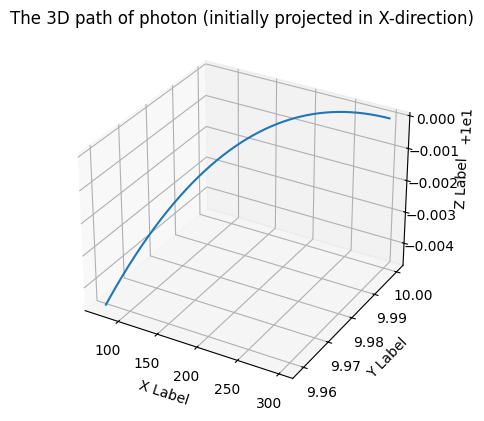

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(sol[:,2], sol[:,4], sol[:,6])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('The 3D path of photon (initially projected in X-direction)')
plt.show()

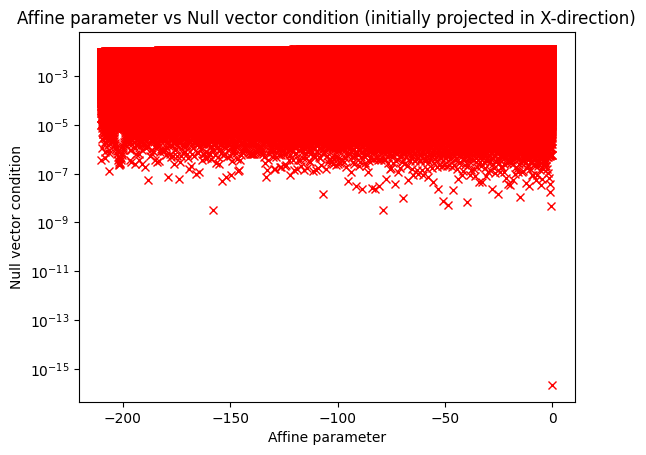

In [14]:
plt.plot(l, np.abs(null_condition), ls='None', marker='x', c='r')
plt.yscale('log')
plt.xlabel('Affine parameter')
plt.ylabel('Null vector condition')
plt.title('Affine parameter vs Null vector condition (initially projected in X-direction)')
plt.show()

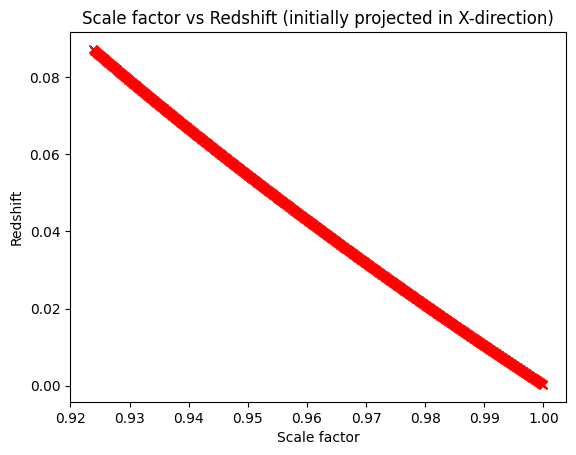

In [15]:
plt.plot(sol[:, 8], z, ls='None', marker='x', c='r')
plt.xlabel('Scale factor')
plt.ylabel('Redshift')
plt.title('Scale factor vs Redshift (initially projected in X-direction)')
plt.show()

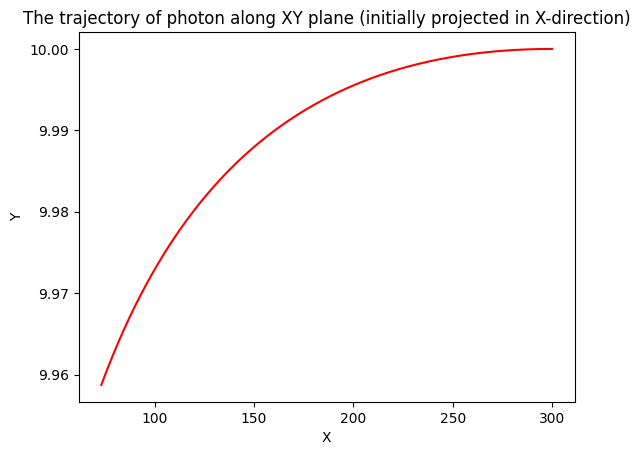

In [16]:
plt.plot(sol[:,2], sol[:,4], 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The trajectory of photon along XY plane (initially projected in X-direction)')
plt.show()

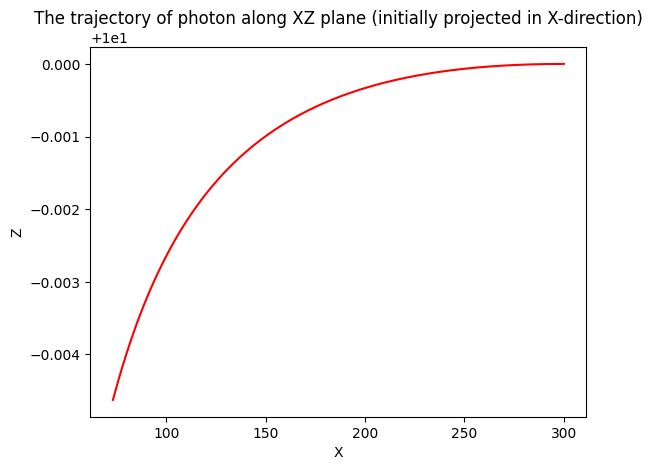

In [17]:
plt.plot(sol[:,2], sol[:,6], 'r')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('The trajectory of photon along XZ plane (initially projected in X-direction)')
plt.show()